In [79]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [80]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# display df
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [81]:
# display df
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [82]:
# Combine the data into a single dataset
combine_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID", how="left")

# Display the data table for preview
combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combine_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
ave_tumor_df = grouped_df.mean()
# Convert to DataFrame
ave_tumor_df = ave_tumor_df.reset_index()
# Preview DataFrame
ave_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_errors = grouped_df.sem()

# Convert to DataFrame
tumor_standard_errors_df = pd.DataFrame(tumor_standard_errors).reset_index()

# Preview DataFrame
tumor_standard_errors_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [85]:
# Minor Data Munging to Re-Format the Data Frames
pivot_ave_tumor_df = ave_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_ave_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


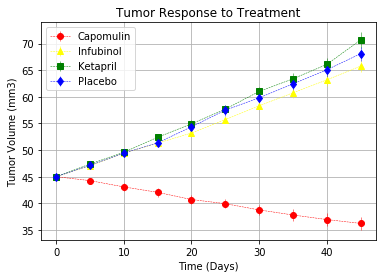

In [86]:
# Generate the Plot (with Error Bars)
plot_format_list = [('Capomulin','o','red'),('Infubinol','^','yellow'),('Ketapril','s','green'),('Placebo','d','blue')]

for drug, marker, colors in plot_format_list:
    ste = tumor_standard_errors[drug]
    tumor_plt = plt.errorbar(pivot_ave_tumor_df.index, pivot_ave_tumor_df[drug], ste, label=drug, linestyle = '--', marker=marker, color=colors, linewidth=0.5)

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid() 

# Save the Figure
plt.savefig('../figures/tumor_response_to_treatment.png')


## Metastatic Response to Treatment

In [87]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = combine_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
avg_met_df = grouped_met_df.mean()
# Convert to DataFrame
avg_met_df = avg_met_df.reset_index()
# Preview DataFrame
avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [88]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = grouped_met_df.sem()
# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors).reset_index()
# Preview DataFrame
met_standard_errors_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [89]:
# Minor Data Munging to Re-Format the Data Frames
pivot_avg_met_df = avg_met_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
pivot_avg_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


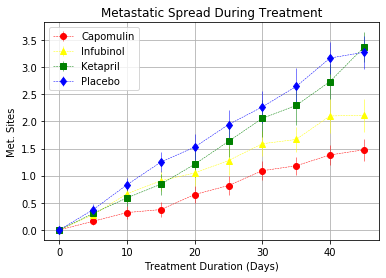

In [90]:
# Generate the Plot (with Error Bars)
for drug, marker, colors in plot_format_list:
    ste = met_standard_errors[drug]
    met_plt = plt.errorbar(pivot_avg_met_df.index, pivot_avg_met_df[drug], ste, label=drug, marker=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()        
        
# Save the Figure
plt.savefig('../figures/metastic_spread_during_treatment.png')

## Survival Rates

In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = combine_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
# Convert to DataFrame
count_mouse_df = pd.DataFrame(count_mouse_df).reset_index()
count_mouse_df = count_mouse_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [92]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
pivot_count_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


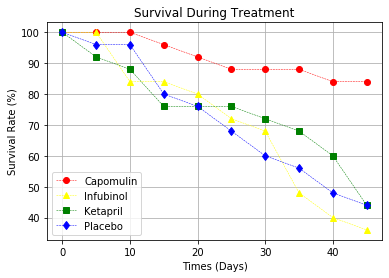

In [93]:
for drug, marker, colors in plot_format_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_rate = (pivot_count_mouse_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_count_mouse_df.index,survival_rate, label=drug, marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('../figures/survival_during_treatment')

## Summary Bar Graph

In [1]:
# Calculate the percent changes for each drug
percentage_change = (pivot_ave_tumor_df.iloc[-1]/(pivot_ave_tumor_df.iloc[0])-1)*100

# Display the data to confirm
percentage_change

NameError: name 'pivot_ave_tumor_df' is not defined

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [0]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)